In [355]:
#Q1
# a)

import wikipedia
wiki = wikipedia.page('JackieChan')
text = wiki.content

#jctext = open ('')

In [356]:
# b)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
jcvocabulary  = vectorizer.fit_transform([text])
print (jcvocabulary)

  (0, 1071)	58
  (0, 409)	249
  (0, 327)	5
  (0, 222)	7
  (0, 15)	2
  (0, 432)	27
  (0, 2133)	2
  (0, 1098)	2
  (0, 1744)	2
  (0, 1211)	2
  (0, 1177)	2
  (0, 288)	2
  (0, 1900)	476
  (0, 659)	15
  (0, 1062)	28
  (0, 988)	47
  (0, 1118)	48
  (0, 130)	11
  (0, 814)	5
  (0, 1240)	7
  (0, 237)	1
  (0, 187)	218
  (0, 1832)	1
  (0, 1116)	6
  (0, 842)	66
  :	:
  (0, 1701)	1
  (0, 313)	1
  (0, 1061)	1
  (0, 743)	2
  (0, 1847)	1
  (0, 1200)	1
  (0, 1506)	1
  (0, 329)	1
  (0, 2049)	1
  (0, 1064)	1
  (0, 817)	1
  (0, 630)	1
  (0, 1324)	1
  (0, 993)	1
  (0, 1453)	1
  (0, 1440)	1
  (0, 100)	1
  (0, 330)	1
  (0, 1570)	1
  (0, 1550)	1
  (0, 763)	1
  (0, 1175)	1
  (0, 1019)	1
  (0, 572)	1
  (0, 167)	1


In [357]:
# d)
# Convert words to lowercase
text = text.lower()

# Remove numbers
import re
text = re.sub(r'\d', '', text)

# Punctuation Removal
text = re.sub(r'[^\w\s]', '', text)

# Tokenization

text = text.split()

# Stop word removal
import nltk

stopwords = nltk.corpus.stopwords.words('english')


def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

text =  remove_stopwords(text)

# Stemming 
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

text = stemming (text)

# Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

text = lemmatizer (text)

print (text)

['jacki', 'chan', 'born', 'april', 'chine', '成龍', 'jyutp', 'sing', 'lung', 'lit', 'becom', 'dragon', 'hong', 'kong', 'actor', 'filmmak', 'martial', 'artist', 'stuntman', 'known', 'slapstick', 'acrobat', 'fight', 'style', 'comic', 'time', 'innov', 'stunt', 'typic', 'perform', 'chan', 'act', 'sinc', 'perform', 'film', 'one', 'popular', 'action', 'film', 'star', 'timechan', 'one', 'recognis', 'influenti', 'film', 'person', 'world', 'widespread', 'global', 'follow', 'eastern', 'western', 'hemispher', 'receiv', 'fame', 'star', 'hong', 'kong', 'avenu', 'star', 'hollywood', 'walk', 'fame', 'chan', 'referenc', 'variou', 'pop', 'song', 'cartoon', 'film', 'video', 'game', 'operat', 'train', 'vocalist', 'also', 'cantopop', 'mandopop', 'star', 'releas', 'number', 'music', 'album', 'sung', 'mani', 'theme', 'song', 'film', 'star', 'also', 'global', 'known', 'philanthropist', 'name', 'one', 'top', 'charit', 'celebr', 'forb', 'magazin', 'film', 'scholar', 'andrew', 'willi', 'state', 'chan', 'perhap', 

In [358]:
# e) 
from nltk import FreqDist

freq_text = FreqDist(text)

print('Most 10:',freq_text.most_common(10))

rearrest_10 = freq_text.most_common().copy()
rearrest_10.reverse()
print('Rearrest 10:',rearrest_10[0:11])


Most 10: [('chan', 229), ('film', 124), ('jacki', 57), ('hong', 47), ('kong', 45), ('stunt', 31), ('star', 31), ('also', 31), ('releas', 30), ('action', 25)]
Rearrest 10: [('allmovi', 1), ('databas', 1), ('imdb', 1), ('link', 1), ('extern', 1), ('read', 1), ('boulevard', 1), ('pictur', 1), ('pmw', 1), ('nomin', 1), ('discographi', 1)]


<Axes: >

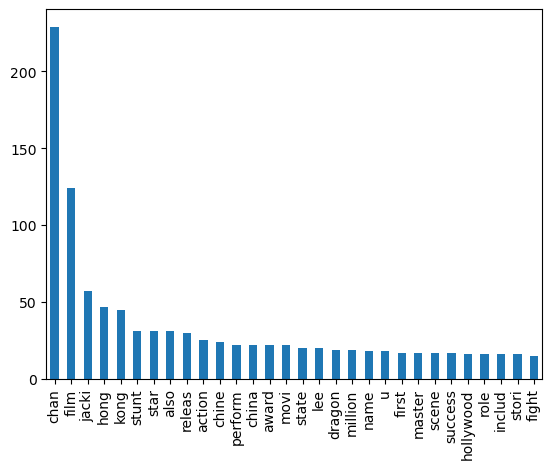

In [359]:
# f)
import matplotlib.pyplot as plt
import pandas as pd

df = pd.Series(dict(freq_text.most_common(30)))
df.plot(kind='bar')


In [428]:
# Q2
# a)
train = pd.read_csv('D:/emotions/train.txt')
train[['words', 'emo']] = train['words'].str.split(';', expand=True) # modify text to do easier dataframe.

train_words = train['words'].values
train_words = [str(train_words) for item in train_words]
train_emo = train['emo'].values

test = pd.read_csv('D:/emotions/test.txt')
test = [str(test) for item in test]
val = pd.read_csv('D:/emotions/val.txt')
val = [str(val) for item in val]

train

,words,emo
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [429]:
# b)
from sklearn.feature_extraction.text import CountVectorizer


cv= CountVectorizer(stop_words='english')
train_prc =cv.fit_transform(train_words)

print ('By CountVectorizer')
print (train_prc.shape)
print (cv.vocabulary_)

from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(stop_words='english')
tv.fit_transform(train_words)
vector = tv.transform(train_words)
print ('By TfidfVectorizer')
print(vector.toarray().shape)
print(tv.vocabulary_)

By CountVectorizer
(16000, 27)
{'didnt': 4, 'feel': 5, 'humiliated': 13, 'feeling': 6, 'hopeless': 12, 'damned': 3, 'hopeful': 11, 'just': 15, 'cares': 1, 'awake': 0, 'im': 14, 'grabbing': 9, 'minute': 19, 'post': 22, 'greedy': 10, 'wrong': 26, 'strong': 24, 'good': 8, 'overall': 20, 'like': 17, 'rude': 23, 'comment': 2, 'glad': 7, 'know': 16, 'lot': 18, 'stupid': 25, 'portray': 21}
By TfidfVectorizer
(16000, 27)
{'didnt': 4, 'feel': 5, 'humiliated': 13, 'feeling': 6, 'hopeless': 12, 'damned': 3, 'hopeful': 11, 'just': 15, 'cares': 1, 'awake': 0, 'im': 14, 'grabbing': 9, 'minute': 19, 'post': 22, 'greedy': 10, 'wrong': 26, 'strong': 24, 'good': 8, 'overall': 20, 'like': 17, 'rude': 23, 'comment': 2, 'glad': 7, 'know': 16, 'lot': 18, 'stupid': 25, 'portray': 21}


In [368]:
# c)
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

train = pd.read_csv('D:/emotions/train.txt')
train[['words', 'emo']] = train['words'].str.split(';', expand=True)
X_train= train['words'].values
Y_train = train['emo'].values

vt = TfidfVectorizer(stop_words='english')
X_train = vt.fit_transform(X_train)

model_re = LogisticRegression()
model_re.fit(X_train, Y_train)

y_pred = model_re.predict(X_train[0:5])

print('From LogisticRegression prediction:', y_pred)
print ('Real one:', Y_train[0:5])

model_nn = MLPClassifier(hidden_layer_sizes=(5, 2), activation='relu', solver='adam') # low hidden_layer_sizes to make it qucik but low accuracy.
model_nn.fit(X_train, Y_train)

y_pred = model_nn.predict(X_train[0:5])

print('From Neural Network  prediction:', y_pred)
print ('Real one:', Y_train[0:5])


c:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


From LogisticRegression prediction: ['sadness' 'sadness' 'anger' 'love' 'anger']
Real one: ['sadness' 'sadness' 'anger' 'love' 'anger']
From Neural Network  prediction: ['sadness' 'sadness' 'anger' 'love' 'anger']
Real one: ['sadness' 'sadness' 'anger' 'love' 'anger']


c:\ProgramData\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [374]:
# d)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

test = pd.read_csv('D:/emotions/test.txt')
test[['words', 'emo']] = test['words'].str.split(';', expand=True)
X_test= test['words'].values
Y_test = test['emo'].values

X_test = vt.fit_transform(X_test)


print (model_re.predict(X_test))

#print ('Accuracy of Neural Network: \n', classification_report (model_nn.predict(X_test), Y_test))
#print ('Accuracy of Logistic Regression: \n', classification_report (model_re.predict(X_test), Y_test))
#print ('Confuison matrix: \n', confusion_matrix (model_re.predict(X_test), Y_test),'\n')

ValueError: X has 4517 features, but LogisticRegression is expecting 14894 features as input.

In [381]:
# d)


test_word1 = ['i feel so sad now',]
test_word1 = vt.fit_transform(test_word1)

test_word2 = ['today i am really happy',]
test_word2 = vt.fit_transform(test_word2)


y_pred1 = model_re.predict(test_word1)
y_pred2 = model_re.predict(test_word2)

print('From LogisticRegression prediction:', y_pred)

print('From Neural Network  prediction:', y_pred)



ValueError: X has 2 features, but LogisticRegression is expecting 14894 features as input.

In [375]:
print (X_train[0])

  (0, 6309)	0.7867657412767967
  (0, 4838)	0.16379156905484632
  (0, 3550)	0.5951235084078971


In [385]:
import pandas as pd
from nltk.tokenize import word_tokenize

# Create a sample DataFrame
data = {'Text': ['This is the first sentence.',
                 'Here comes the second sentence.',
                 'And finally, the third sentence.']}
df = pd.DataFrame(data)

# Tokenize the text in the DataFrame
df['Tokenized_Text'] = df['Text'].apply(word_tokenize)

# Display the DataFrame with tokenized text
print(df)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\try/nltk_data'
    - 'c:\\ProgramData\\Miniconda3\\nltk_data'
    - 'c:\\ProgramData\\Miniconda3\\share\\nltk_data'
    - 'c:\\ProgramData\\Miniconda3\\lib\\nltk_data'
    - 'C:\\Users\\try\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
